Group Members: Rosamelia Carioni, Elena Perego, Mischa Rauch.
Student IDs:

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# 1. Import data TODO: House density

In [37]:
crime_density = pd.read_csv('clean_data/crime.csv')
median_gross_earning = pd.read_csv('clean_data/median_gross_annual_earning.csv')
personal_well_being = pd.read_csv('clean_data/personal_well_being.csv')
population = pd.read_csv('clean_data/population_annual.csv')
waste = pd.read_csv('clean_data/waste.csv')
gas_energy_consumption = pd.read_csv('clean_data/energy_gas_consumption_annual.csv')
electricity_energy_consumption = pd.read_csv('clean_data/energy_electricity_consumption_annual.csv')
# Both median and mean were stracted for experimentation purposes, however, for the final model the median will be considered.
median_house_price = pd.read_csv('clean_data/median_house_price.csv')

# 2. Clean and Structure the data

This step was done in the files 'reding_data_x.ipynb' where x={1,2,3}. In these files, the data was read, as extracted from London Data Store, and structured so that all of them had the same structure and features. The dataframes will be merged into one dataframe in step 5, after the outlier removal is done and the correlation with the house price is checked.

In [21]:
#df = crime_density.groupby(['Code', 'Year'])['Value'].sum().reset_index().pivot(index='Code', columns='Year', values='Value')

merge1 = pd.merge(crime_density,median_gross_earning, on = ['Area','Code','Year'])
merge2 = pd.merge(merge1, personal_well_being, on = ['Area','Code','Year'])
merge3 = pd.merge(merge2, population, on = ['Area','Code','Year'])
merge4 = pd.merge(merge3, waste, on = ['Area','Code','Year'])
data = pd.merge(merge4, median_house_price, on = ['Area','Code','Year'])
#merge6 = pd.merge(merge5, gas_energy_consumption, on = ['Area','Code','Year'])
#data = pd.merge(merge6, electricity_energy_consumption, on = ['Area','Code','Year'])

data.head()

Code                  Area  Year  Number_of_crimes  \
0  E09000002  Barking and Dagenham  2011              1635   
1  E09000003                Barnet  2011              2243   
2  E09000004                Bexley  2011               982   
3  E09000005                 Brent  2011              2601   
4  E09000006               Bromley  2011              1797   

   Median_annual_earning  Mean_life_satisfaction  Population_estimates  \
0                  28201                    7.05                187029   
1                  30237                    7.43                357538   
2                  28638                    7.42                232774   
3                  26772                    7.11                312245   
4                  28163                    7.50                310554   

   Waste_recycling_rates  Median_house_price  
0                   30.0            170000.0  
1                   33.6            325000.0  
2                   53.5            215000.0  
3                   36.8            300000.0  
4                   49.9            275000.0

In [44]:
corr = data.corr()
corr

/var/folders/x1/8mvq21453dx722swn08f95280000gn/T/ipykernel_25955/2601176157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


Year  Number_of_crimes  Median_annual_earning  \
Year                     1.000000         -0.154063               0.051289   
Number_of_crimes        -0.154063          1.000000               0.467126   
Median_annual_earning    0.051289          0.467126               1.000000   
Mean_life_satisfaction   0.555616         -0.317586              -0.072150   
Population_estimates     0.091037          0.350517              -0.093008   
Waste_recycling_rates   -0.074071         -0.479166              -0.402135   
Median_house_price       0.301254          0.247685               0.322596   
Gas_consumption         -0.283463          0.063109              -0.356992   
Electricity_consumption  0.618907          0.044714              -0.054028   

                         Mean_life_satisfaction  Population_estimates  \
Year                                   0.555616              0.091037   
Number_of_crimes                      -0.317586              0.350517   
Median_annual_earning                 -0.072150             -0.093008   
Mean_life_satisfaction                 1.000000             -0.094731   
Population_estimates                  -0.094731              1.000000   
Waste_recycling_rates                  0.175588              0.025684   
Median_house_price                     0.363989             -0.365789   
Gas_consumption                       -0.065016              0.647952   
Electricity_consumption                0.332834              0.354417   

                         Waste_recycling_rates  Median_house_price  \
Year                                 -0.074071            0.301254   
Number_of_crimes                     -0.479166            0.247685   
Median_annual_earning                -0.402135            0.322596   
Mean_life_satisfaction                0.175588            0.363989   
Population_estimates                  0.025684           -0.365789   
Waste_recycling_rates                 1.000000           -0.313109   
Median_house_price                   -0.313109            1.000000   
Gas_consumption                       0.340604           -0.351730   
Electricity_consumption               0.041879            0.129490   

                         Gas_consumption  Electricity_consumption  
Year                           -0.283463                 0.618907  
Number_of_crimes                0.063109                 0.044714  
Median_annual_earning          -0.356992                -0.054028  
Mean_life_satisfaction         -0.065016                 0.332834  
Population_estimates            0.647952                 0.354417  
Waste_recycling_rates           0.340604                 0.041879  
Median_house_price             -0.351730                 0.129490  
Gas_consumption                 1.000000                -0.068100  
Electricity_consumption        -0.068100                 1.000000

# 3. EDA: Outlier Removal (each does its own --> same as clinic but also make nicer)
# TODO: write that we do not remove outliers

# 4. EDA: Visualizations 

This should show correlations with happiness per feature. Meli: do happiness with year and neighbourhood.

In [44]:
red = 'YlOrRd'
blue = 'BuPu'
green = 'YlGn'
def create_map(feature_name, color):
    # create a map centered on London
    london_map = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

    # add choropleth layer to the map
    folium.Choropleth(
        geo_data='clean_data/london_boroughs.json',
        name='choropleth',
        data=data,
        columns=['Area', feature_name],
        key_on='feature.properties.name',
        fill_color= color,
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=feature_name
    ).add_to(london_map)
    # add layer control to the map
    folium.LayerControl().add_to(london_map)
    # display the map
    return london_map

## Personal Well-Being over the Years

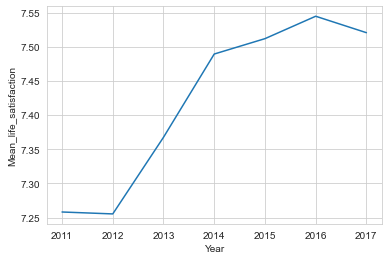

In [26]:
# Group data by year and calculate the mean of 'Mean_life_satisfaction'
def time_series_over_year(feature_name):
    mean_satisfaction = data.groupby('Year')[feature_name].mean()
    # Create a line plot of mean life satisfaction by year
    plt.plot(mean_satisfaction.index, mean_satisfaction.values)

    # Add labels and title to the plot
    plt.xlabel('Year')
    plt.ylabel(feature_name)

    # Show the plot
    plt.show()

time_series_over_year('Mean_life_satisfaction')

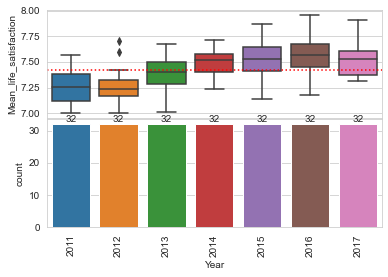

In [27]:
def plot_distribution_price_feature(x_name, y_name, data):
    fig, axs = plt.subplots(nrows=2)

    sns.boxplot(
        x= x_name,
        y=y_name,
        data=data.sort_values(x_name),
        ax=axs[0]
    )

    sns.countplot(
        x= x_name,
        data=data.sort_values(x_name),
        ax=axs[1]
    )

    # Draw median price
    axs[0].axhline(
        y=data[y_name].median(),
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.01)

plot_distribution_price_feature('Year', 'Mean_life_satisfaction', data)

## Neighbourhoods and Personal Well-Being

In [52]:
map_satisfaction = create_map('Mean_life_satisfaction', red)
map_satisfaction

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

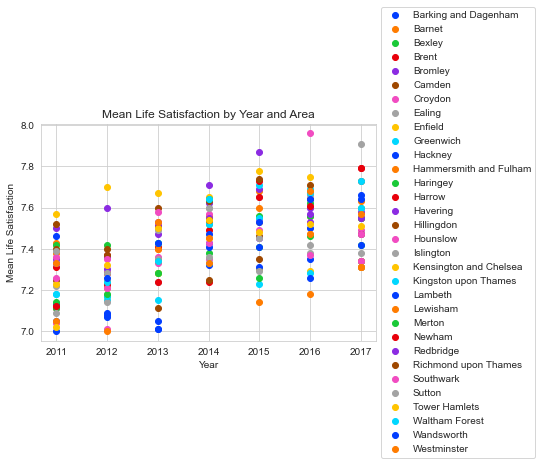

In [53]:
df = data

# Set the color palette based on the unique areas in the data
colors = sns.color_palette("bright", len(df['Area'].unique()))

# Create the plot
fig, ax = plt.subplots()
for i, area in enumerate(df['Area'].unique()):
    subset = df[df['Area'] == area]
    ax.scatter(subset['Year'], subset['Mean_life_satisfaction'], c=colors[i], label=area)

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean Life Satisfaction')
ax.set_title('Mean Life Satisfaction by Year and Area')

# Add the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

## Average House Price and Personal Well-Being


In [29]:
def plot_linear_relationship_and_spread(feature_name, data):
    sns.jointplot(
        x=feature_name,
        y='Mean_life_satisfaction',
        data=data,
        #    stat_func=None,
        kind="reg",
        ratio=4,
        space=0,
        scatter_kws={
            's': 3,
            'alpha': 0.25
        },
        line_kws={
            'color': 'black'
        }
    )


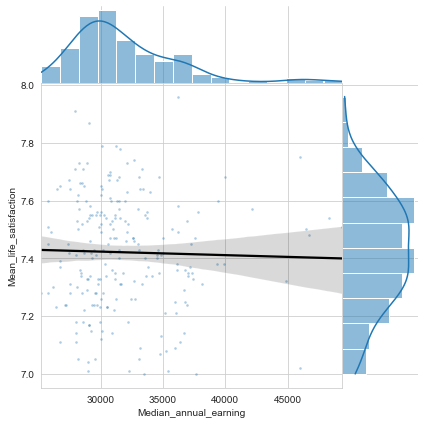

In [30]:
#plot_linear_relationship_and_spread('Median_house_price', data)
plot_linear_relationship_and_spread('Median_annual_earning', data)


## Average Income and Personal Well-Being


## Crime rates and Personal Well-Being

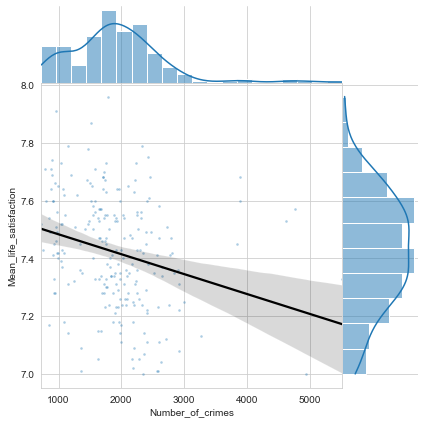

In [31]:
plot_linear_relationship_and_spread('Number_of_crimes', data)

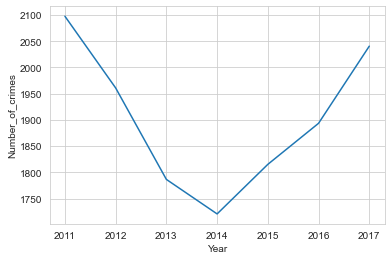

In [34]:
time_series_over_year('Number_of_crimes')

In [46]:
map_crime = create_map('Number_of_crimes', blue)
map_crime

## Waste

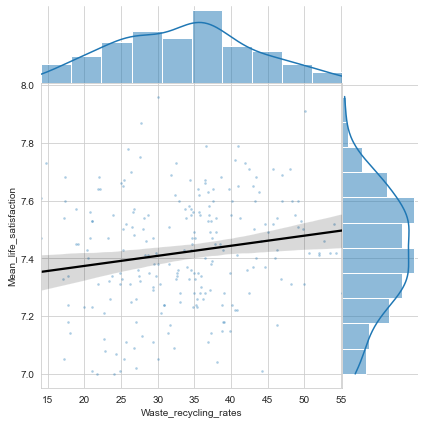

In [47]:
plot_linear_relationship_and_spread('Waste_recycling_rates', data)

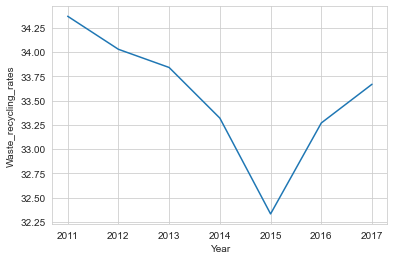

In [48]:
time_series_over_year('Waste_recycling_rates')

In [51]:
map_waste = create_map('Waste_recycling_rates', green)
map_waste

### Make plot --> RQ 1 --> "How does location of neighborhoods affect personal well-being in London?"  (ELENA)

### Compare all variables with nice plots to house price --> RQ 2  (Meli: hers + crime, Mischa: his + house density, Ele: waste)

# 5. Models for Personal-Wellbeing Prediction

# 5.0 Create training set (ALL: based on results from before, create a df, verifying the correlation of variables) S

## 5.1 Linear Regression (elena)

## 5.2 Polynomial Regression (Mischa)

## 5.3 Random Forest (Meli)

## 5.4 Neural Network (Mischa)

# 6. Ethical Implications (Elena, Meli)

# 7. Conclusion (ALL)